Condition Parameters

Inverse Calculation Numerically

In [2]:
import math

#determine parameter
rpm = 400
omega = 2 * math.pi * rpm / 60

h_c = 0.36825 #m
r = 0.17 #m
x_f = 2.2 #m
y_f_min = 0.755 #m
y_f_max = 1.2313 #m
g = 9.783 #m/s^2

# function to be equal to zero
def f(theta, y, x=x_f) :
    return y - (h_c + r * math.sin(theta)) - (x + r*math.cos(theta)) / math.tan(theta) + 0.5*g*((x+r*math.cos(theta))/(omega*r*math.sin(theta)))**2

#using numerical method to solve for theta
def theta(y, x=x_f, diff_tlr=1e-6) :
    # Newton-Raphson method
    theta = math.pi / 6
    while abs(f(theta, y, x)) > diff_tlr :
        theta = theta - f(theta, y, x) / (f(theta + diff_tlr, y, x) - f(theta, y, x)) * diff_tlr
    return theta

#calculate the angle from y_f_min to y_f_max with step 0.01
y = y_f_min
while y <= y_f_max :
    print(f"y = {y}, theta = {theta(y)*180/math.pi}")
    y += 0.01

y = 0.755, theta = 71.0475951568128
y = 0.765, theta = 70.770414609314
y = 0.775, theta = 70.49346356758993
y = 0.785, theta = 70.21675064976267
y = 0.795, theta = 69.94028437637381
y = 0.805, theta = 69.66407316823467
y = 0.8150000000000001, theta = 69.38812534430663
y = 0.8250000000000001, theta = 69.11244911961373
y = 0.8350000000000001, theta = 68.8370526032044
y = 0.8450000000000001, theta = 68.56194379614523
y = 0.8550000000000001, theta = 68.28713058954852
y = 0.8650000000000001, theta = 68.01262076267236
y = 0.8750000000000001, theta = 67.73842198096072
y = 0.8850000000000001, theta = 67.46454179432016
y = 0.8950000000000001, theta = 67.19098763517152
y = 0.9050000000000001, theta = 66.91776681676221
y = 0.9150000000000001, theta = 66.64488653140157
y = 0.9250000000000002, theta = 66.37235384878848
y = 0.9350000000000002, theta = 66.10017571427008
y = 0.9450000000000002, theta = 65.82835894736137
y = 0.9550000000000002, theta = 65.55691024000812
y = 0.9650000000000002, theta = 

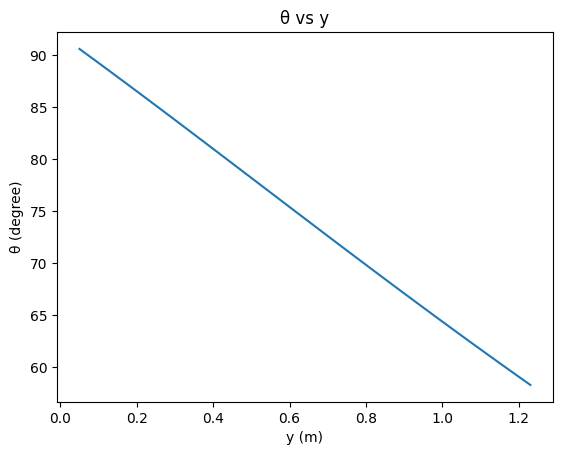

In [3]:
# plot theta vs y
import matplotlib.pyplot as plt
import numpy as np
y_l = np.arange(.05, y_f_max, 0.01)
theta_l = [theta(y_i)*180/math.pi for y_i in y_l]
plt.plot(y_l, theta_l)
plt.xlabel('y (m)')
plt.ylabel('θ (degree)')
plt.title('θ vs y')
plt.show()

Forward Function and Derivative Analysis

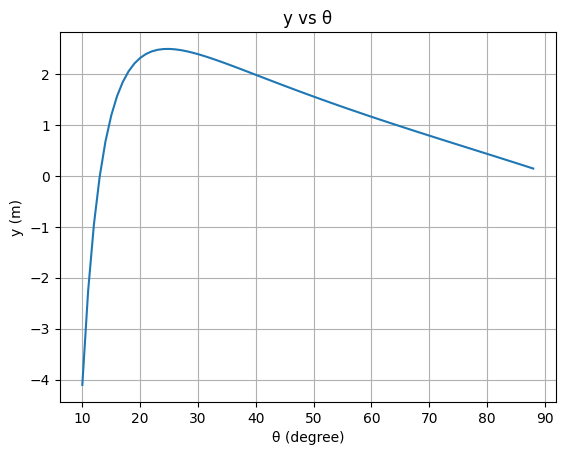

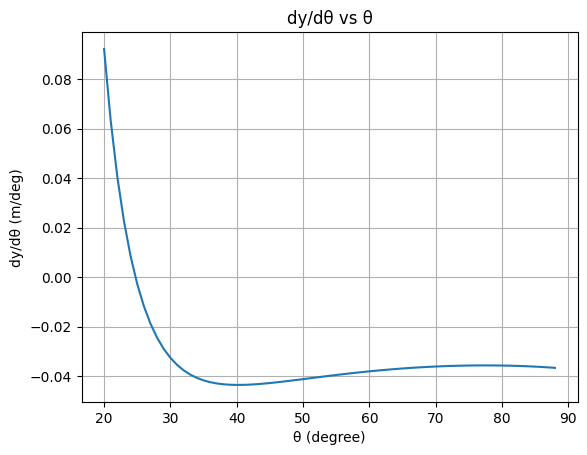

In [4]:
def y_of_theta(theta, x=x_f) :
    return h_c + r * math.sin(theta) + (x + r*math.cos(theta)) / math.tan(theta) - 0.5*g*((x+r*math.cos(theta))/(omega*r*math.sin(theta)))**2

# plot y vs theta from 1 to 89 degree
theta_l = np.arange(10, 89, 1)
y_l = [y_of_theta(theta_i*math.pi/180) for theta_i in theta_l]
plt.plot(theta_l, y_l)
plt.xlabel('θ (degree)')
plt.ylabel('y (m)')
plt.title('y vs θ')
plt.grid()
plt.show()

# function for derivative of y with respect to theta
def dy_dtheta(theta, x=x_f, tlr=1e-8) :
    return (y_of_theta(theta+tlr, x) - y_of_theta(theta, x)) / tlr

def plot_dy_dtheta(dy_dtheta_l, theta_l) :
    plt.plot(theta_l, dy_dtheta_l)
    plt.xlabel('θ (degree)')
    plt.ylabel('dy/dθ (m/deg)')
    plt.title('dy/dθ vs θ')
    plt.grid()
    plt.show()

# plot dy/dtheta vs theta from 1 to 89 degree in m/deg
theta_l = np.arange(20, 89, 1)
dy_dtheta_l = [dy_dtheta(theta_i*math.pi/180) for theta_i in theta_l]
dy_dtheta_l = [dy_dtheta_i / (180 / math.pi) for dy_dtheta_i in dy_dtheta_l]
plot_dy_dtheta(dy_dtheta_l, theta_l)


Varying r

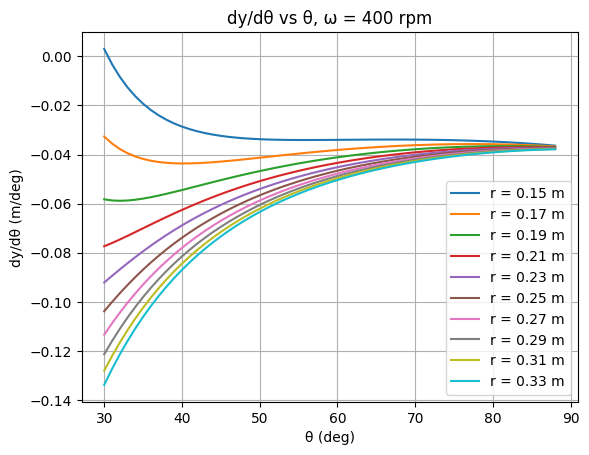

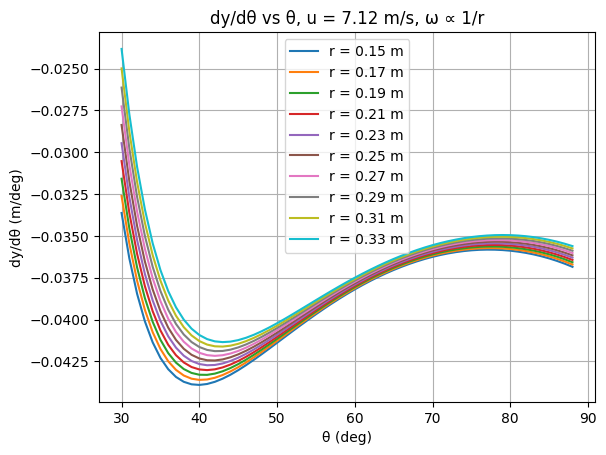

In [5]:
# plot dy/dtheta vs theta from 1 to 89 degree in m/deg by varying r from 0.15 to 0.35 in one plot
r_l = np.arange(0.15, 0.35, 0.02)
theta_l = np.arange(30, 89, 1)
for r in r_l :
    #omega = (2 * math.pi * rpm / 60)*0.17 / r
    dy_dtheta_l = [dy_dtheta(theta_i*math.pi/180) for theta_i in theta_l]
    dy_dtheta_l = [dy_dtheta_i / (180 / math.pi) for dy_dtheta_i in dy_dtheta_l] # m/deg
    plt.plot(theta_l, dy_dtheta_l, label=f'r = {r:.2f} m')
plt.xlabel('θ (deg)')
plt.ylabel('dy/dθ (m/deg)')
plt.title('dy/dθ vs θ, ω = 400 rpm')
plt.legend()
plt.grid()
plt.show()

# consider omega inverse proportional to r
expected_u = 7.12 #m/s
r_l = np.arange(0.15, 0.35, 0.02)
theta_l = np.arange(30, 89, 1)
for r in r_l :
    omega = expected_u / r
    dy_dtheta_l = [dy_dtheta(theta_i*math.pi/180) for theta_i in theta_l]
    dy_dtheta_l = [dy_dtheta_i / (180 / math.pi) for dy_dtheta_i in dy_dtheta_l] # m/deg
    plt.plot(theta_l, dy_dtheta_l, label=f'r = {r:.2f} m')
plt.xlabel('θ (deg)')
plt.ylabel('dy/dθ (m/deg)')
plt.title('dy/dθ vs θ, u = 7.12 m/s, ω ∝ 1/r')
plt.legend()
plt.grid()
plt.show()

Error Respected to t

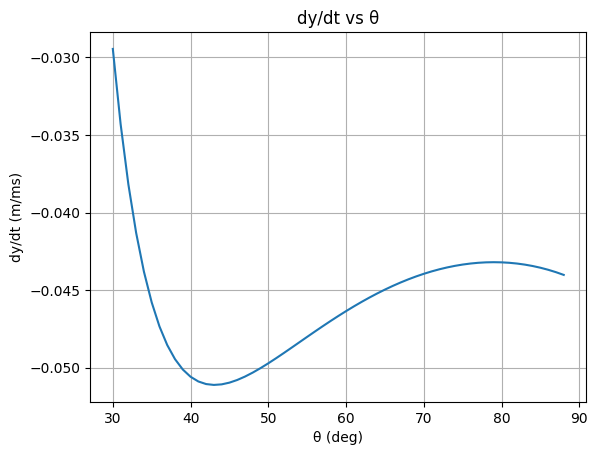

In [6]:
# dt is the error int time that may cause the error to θ and y

def dy_dt(theta, x=x_f) :
    return omega * dy_dtheta(theta, x)

# plot dy/dt vs theta from 1 to 89 degree in m/ms
theta_l = np.arange(30, 89, 1)
dy_dt_l = [dy_dt(theta_i*math.pi/180) for theta_i in theta_l]
dy_dt_l = [dy_dt_i / 1000 for dy_dt_i in dy_dt_l] # m/ms
plt.plot(theta_l, dy_dt_l)
plt.xlabel('θ (deg)')
plt.ylabel('dy/dt (m/ms)')
plt.title('dy/dt vs θ')
plt.grid()
plt.show()


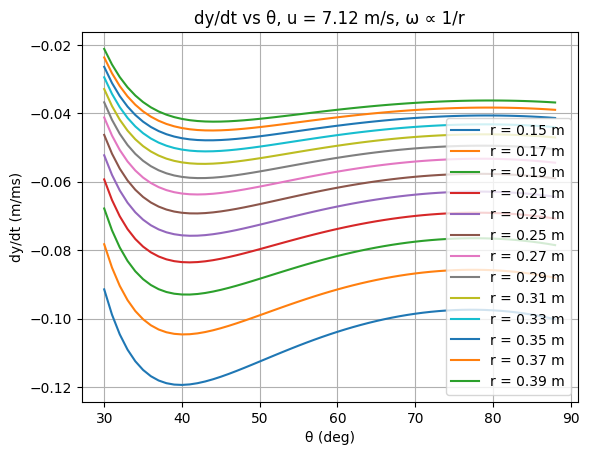

In [7]:
# plot dy/dt vs theta from 1 to 89 degree in m/ms by varying r from 0.15 to 0.35 in one plot
expected_u = 7.12 #m/s
r_l = np.arange(0.15, 0.40, 0.02)
theta_l = np.arange(30, 89, 1)
for r in r_l :
    omega = expected_u / r
    dy_dt_l = [dy_dt(theta_i*math.pi/180) for theta_i in theta_l]
    dy_dt_l = [dy_dt_i / 1000 for dy_dt_i in dy_dt_l] # m/ms
    plt.plot(theta_l, dy_dt_l, label=f'r = {r:.2f} m')
plt.xlabel('θ (deg)')
plt.ylabel('dy/dt (m/ms)')
plt.title('dy/dt vs θ, u = 7.12 m/s, ω ∝ 1/r')
plt.legend()
plt.grid()
plt.show()
